In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from HARK.utilities import plot_funcs

from estimark.agents import BequestWarmGlowLifeCycleConsumerType
from estimark.calibration import parameters

***NOTE: using a 'quick fix' for an attribute error. See 'Error Notes' in EstimationParameter.py for further discussion.***


In [2]:
DiscFacAdj, CRRA = np.genfromtxt(
    "tables/WarmGlow_estimate_results.csv",
    skip_header=1,
    delimiter=",",
)

In [3]:
indshk_agent = BequestWarmGlowLifeCycleConsumerType(**parameters.init_consumer_objects)

indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in parameters.timevary_DiscFac]

In [4]:
indshk_agent.solve()

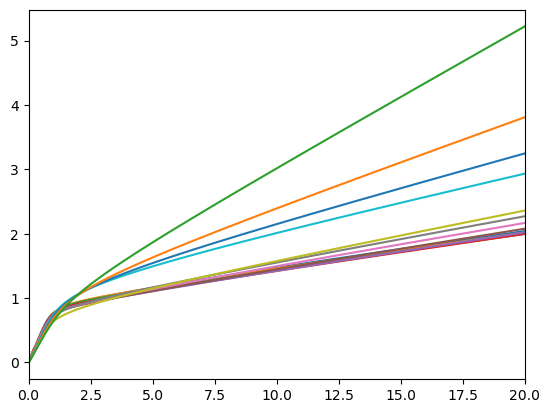

<Figure size 640x480 with 0 Axes>

In [5]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
plt.savefig("../content/figures/WarmGlowIndShock_cFunc.png")

In [6]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = 200
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [7]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

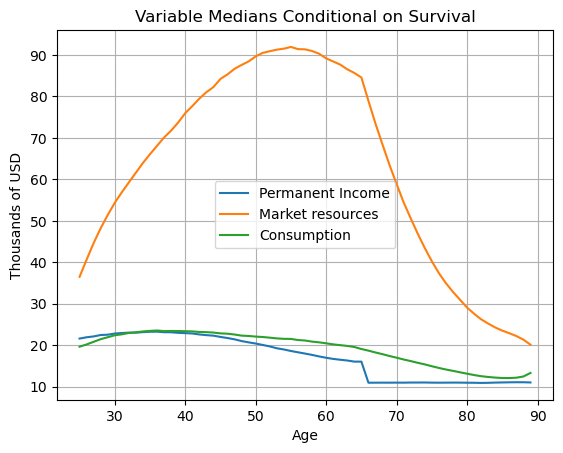

In [8]:
# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()